### Data Cleaning with Pandas

ngedrop data / ngetrim data - membuang2 uang lol

In [7]:
import numpy as np
import pandas as pd

In [8]:
df_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [9]:
df = df_ori.copy()
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [10]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [11]:
df.ST_NUM.isnull().sum() # sum() buat hitung brp missing data
# kalo count() hitung jumlah data nya per kolom

2

In [12]:
df[['ST_NUM' , 'ST_NAME']].isnull().sum()

ST_NUM     2
ST_NAME    0
dtype: int64

In [13]:
df.NUM_BEDROOMS.isnull() #true = missing value

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

n/a dan NA = dibaca sbg missing value oleh py

-- dan na = dibaca sbg string oleh py

kalo misalnya missing value ga kebaca, kita harus define sendiri missing values nya apa aja dgn format missing_values = ["n/a", "na", "--]

In [14]:
missing_value= ['--','na']

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',na_values=missing_value)

In [16]:
cnt =0 #cnt cuman variabel dari index yang ke berapa (0)
for i in df['OWN_OCCUPIED']:
    try:
        int(i) #kalo dia ga di integer, di ignore
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan #np.nan buat kasi missingvalue 
    except ValueError:
        pass
    cnt+=1

In [17]:
df.OWN_OCCUPIED

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

summarize missing value

In [18]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [19]:
df.isnull().sum() #kenapa beda dari kode.id karna kt blm define missing value & handling missing value

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [20]:
df.isnull().values.any()

True

In [21]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [22]:
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

artinya True betul di data kita ada missing value

In [23]:
df.isnull().sum().sum()

12

jadi total jumlah dari misval setiap column adalah 12 values

Replacing

untuk imputasi missing_value, harus dicek dulu distribusi datanya.
skew/normal distribusi

jika skew nya:
-0.5 s/d 0.5, maka bisa dibilang normal distribution
-0.5 s/d -1 OR 0.5 s/d 1, maka skew distribution
< -1 OR > 1 maka extreme skew distribution

jika normal distribution --> metode imputasinya.mean()
jika skew distribution --> metode imputasinya .median()

In [24]:
df.ST_NUM.skew()

-2.497141895219325

karena kolom ST_NUM adalah skew extreme, maka imputasi menggunakan median

In [25]:
df.ST_NUM.fillna(df.ST_NUM.median(), inplace=True) #inplace buat replace misval saat dipanggil lagi

In [26]:
df.ST_NUM

0    104.0
1    197.0
2    203.0
3    201.0
4    203.0
5    207.0
6    203.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [27]:
df.loc[2,'ST_NUM'] = 125 # 2 = label ke 2

In [28]:
df.iloc[2,1] # 2 pertama ->> mulai dari index ke 2, trs yg column posisi 2 (st. name)
#iloc cm integer bkn string

125.0

In [29]:
data_obes = pd.read_excel('obes.xls',sheet_name="7.2", skiprows=4, skipfooter=14)
data_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [30]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


pd.concat untuk gabung 

In [31]:
data_obes.rename(columns= {'Unnamed: 0' : 'Year'},inplace=True)

In [32]:
data_obes.info

<bound method DataFrame.info of        Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
0       NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN    NaN   
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012

In [33]:
data_obes.columns

Index(['Year', 'Total', 'Under 16', '16-24', '25-34', '35-44', '45-54',
       '55-64', '65-74', '75 and over'],
      dtype='object')

In [34]:
data_obes.set_index('Year', inplace=True)

In [35]:
data_obes.info

<bound method DataFrame.info of            Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Year                                                                       
NaN          NaN       NaN    NaN     NaN     NaN     NaN     NaN    NaN   
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.

In [36]:
data_obes.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [37]:
data_obes.dropna(inplace=True)

In [38]:
data_obes.columns

Index(['Total', 'Under 16', '16-24', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75 and over'],
      dtype='object')

pandas.plot documentation

<Axes: xlabel='Year'>

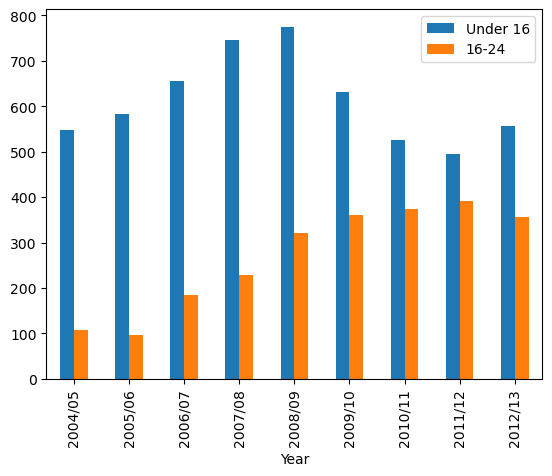

In [39]:
data_obes.loc[data_obes.Total > 2000, ['Under 16','16-24']].plot(kind='bar')

In [40]:
import matplotlib as mpl

In [41]:
data_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [42]:
data_obes.columns

Index(['Total', 'Under 16', '16-24', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75 and over'],
      dtype='object')

<Axes: xlabel='Year'>

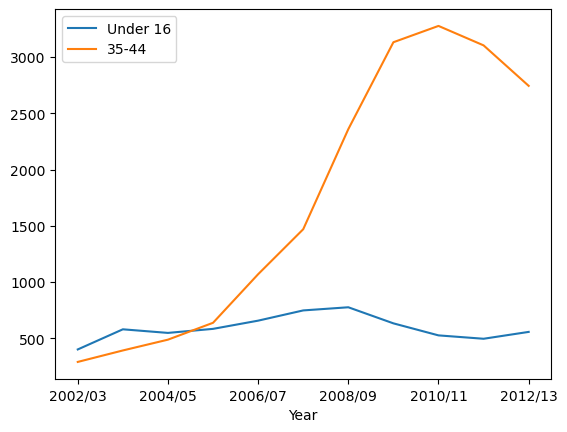

In [43]:
data_obes['Under 16'].plot(label='Under 16', legend=True)
data_obes['35-44'].plot(label='35-44', legend=True)

So who is getting fatter?  

Ketika obesitas anak sedikit menurun, orangtua mereka membengkak.  
Jadi nampaknya para orangtua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya.

time series -- 

In [44]:
from datetime import datetime


In [46]:
date_rng = pd.date_range(start='1/01/2020', end='2/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-02-07 15:00:00', '2020-02-07 16:00:00',
               '2020-02-07 17:00:00', '2020-02-07 18:00:00',
               '2020-02-07 19:00:00', '2020-02-07 20:00:00',
               '2020-02-07 21:00:00', '2020-02-07 22:00:00',
               '2020-02-07 23:00:00', '2020-02-08 00:00:00'],
              dtype='datetime64[ns]', length=913, freq='H')

In [47]:
dft = pd.DataFrame(date_rng, columns=['date'])

In [50]:
dft['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [51]:
dft.head()

,date,data
0,2020-01-01 00:00:00,34
1,2020-01-01 01:00:00,38
2,2020-01-01 02:00:00,73
3,2020-01-01 03:00:00,65
4,2020-01-01 04:00:00,88


In [52]:
dft['datetime'] = pd.to_datetime(dft['date'])

In [53]:
dft=dft.set_index('datetime')

In [55]:
dft.drop(['date'], axis=1, inplace=True)
dft.head()

,data
datetime,
2020-01-01 00:00:00,34
2020-01-01 01:00:00,38
2020-01-01 02:00:00,73
2020-01-01 03:00:00,65
2020-01-01 04:00:00,88


mengubah date_rng menjadi list of string dan kemudian ubah string tsb menjadi timestamp

In [56]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [59]:
timestamp_date_rng = pd.to_datetime(string_date_rng,
infer_datetime_format=True)
timestamp_date_rng

/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_828/1440082780.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  timestamp_date_rng = pd.to_datetime(string_date_rng,


DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-02-07 15:00:00', '2020-02-07 16:00:00',
               '2020-02-07 17:00:00', '2020-02-07 18:00:00',
               '2020-02-07 19:00:00', '2020-02-07 20:00:00',
               '2020-02-07 21:00:00', '2020-02-07 22:00:00',
               '2020-02-07 23:00:00', '2020-02-08 00:00:00'],
              dtype='datetime64[ns]', length=913, freq=None)

mengubah daftar tanggal berubah-ubah menjadi string dan mengubahnya menjadi timestamps

In [60]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [61]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

memasukkan ke data frame

In [62]:
dft2 = pd.DataFrame(timestamp_date_rng_2, columns = ['date'])
dft2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


ingin melihat data di mana tanggalnya adalah tanggal 2 setiap bulannya

In [63]:
dft[dft.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,44
2020-01-02 01:00:00,72
2020-01-02 02:00:00,36
2020-01-02 03:00:00,4
2020-01-02 04:00:00,60
2020-01-02 05:00:00,4
2020-01-02 06:00:00,74
2020-01-02 07:00:00,55
2020-01-02 08:00:00,63


In [65]:
dft['2020-01-02']

KeyError: '2020-01-02'

rolling mean/rolling sum

In [66]:
dft['rolling_sum'] = dft.rolling(3).sum()
dft.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,34,NaN
2020-01-01 01:00:00,38,NaN
2020-01-01 02:00:00,73,145.0
2020-01-01 03:00:00,65,176.0
2020-01-01 04:00:00,88,226.0


utk melihat bagaimana kita dpt melakukan forward / backfilling data saat bekerja dgn nilai data yg hilang

In [67]:
dft['rolling_sum_backfilled'] = 
dft['rolling)sum'].fillna(method='backfill')

SyntaxError: invalid syntax (2938878579.py, line 1)